In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now that your Google Drive is mounted, you can import data from a file. Replace `/path/to/your/file.csv` with the actual path to your file in Google Drive.

In [ ]:
import pandas as pd

# Replace '/path/to/your/file.csv' with the actual path to your file
file_path = '/content/drive/My Drive/DA/revou/Data.csv'

try:
    df_from_drive = pd.read_csv(file_path)
    display(df_from_drive.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


In [ ]:
file_path = '/content/drive/My Drive/DA/revou/Data.csv'
df_from_drive = pd.read_csv(file_path)
display(df_from_drive.head())

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


In [ ]:
df_from_drive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2824 non-null   int64  
 1   QUANTITYORDERED  2824 non-null   int64  
 2   PRICEEACH        2824 non-null   float64
 3   ORDERDATE        2824 non-null   object 
 4   STATUS           2824 non-null   object 
 5   PRODUCTLINE      2824 non-null   object 
 6   PRODUCTCODE      2824 non-null   object 
 7   CUSTOMERNAME     2824 non-null   object 
 8   CITY             2824 non-null   object 
 9   DEALSIZE         2824 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 220.8+ KB


In [ ]:
display(df_from_drive.isnull().sum())

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERDATE,0
STATUS,0
PRODUCTLINE,0
PRODUCTCODE,0
CUSTOMERNAME,0
CITY,0
DEALSIZE,0


# Task
Analyze the provided data to identify the product lines with the highest and lowest sales counts. Create a chart to visualize the distribution of product lines and highlight the product lines with the highest and lowest sales.

## Count product lines

### Subtask:
Calculate the number of occurrences for each product line.


**Reasoning**:
Calculate the number of occurrences for each product line using value_counts.



In [ ]:
product_line_counts = df_from_drive['PRODUCTLINE'].value_counts()
product_line_counts

,count
PRODUCTLINE,
Classic Cars,967
Vintage Cars,608
Motorcycles,331
Planes,306
Trucks and Buses,301
Ships,234
Trains,77


## Identify highest and lowest sales

### Subtask:
Determine the product lines with the maximum and minimum counts.


**Reasoning**:
Find the product line with the highest and lowest counts and print them.



In [ ]:
highest_sales_product_line = product_line_counts.idxmax()
lowest_sales_product_line = product_line_counts.idxmin()

print(f"Product line with the highest sales: {highest_sales_product_line}")
print(f"Product line with the lowest sales: {lowest_sales_product_line}")

Product line with the highest sales: Classic Cars
Product line with the lowest sales: Trains


In [ ]:
# Hitung total sales
df_from_drive["SALES"] = df_from_drive["QUANTITYORDERED"] * df_from_drive["PRICEEACH"]

In [ ]:
# Kelompokkan berdasarkan PRODUCTLINE
product_sales = df_from_drive.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)

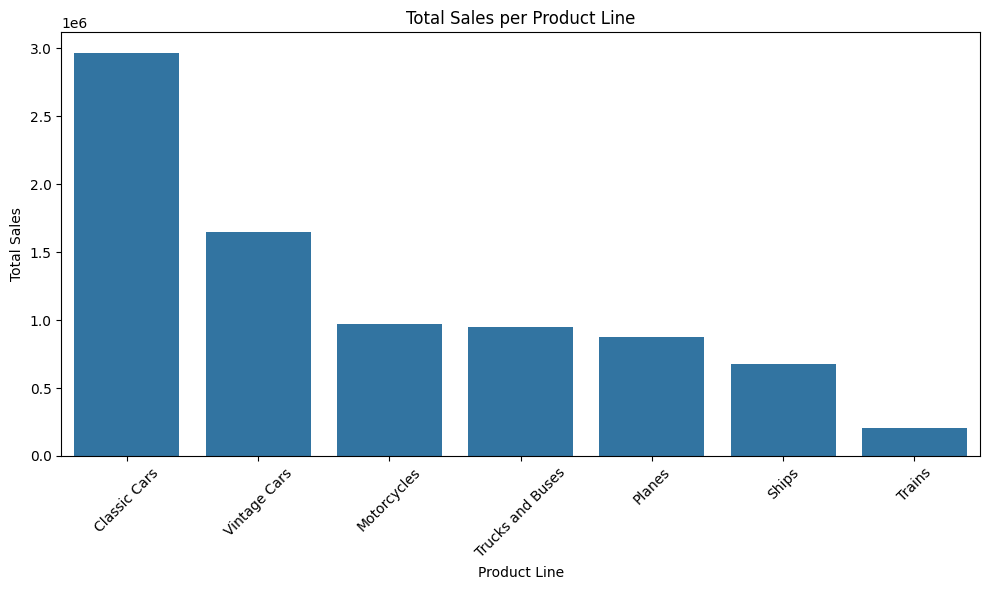

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title("Total Sales per Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Summary:

### Data Analysis Key Findings

*   "Classic Cars" had the highest sales count.
*   "Trains" had the lowest sales count.
*   A bar chart was successfully generated to visualize the distribution of product line sales.

### Insights or Next Steps

*   Focus marketing and sales efforts on the "Classic Cars" product line to capitalize on its high sales performance.
*   Investigate the reasons for low sales in the "Trains" product line and consider strategies for improvement, such as product development or targeted marketing.


In [ ]:
# Pastikan kolom ORDERDATE berupa datetime
df_from_drive["ORDERDATE"] = pd.to_datetime(df_from_drive["ORDERDATE"])

<Figure size 1200x600 with 0 Axes>

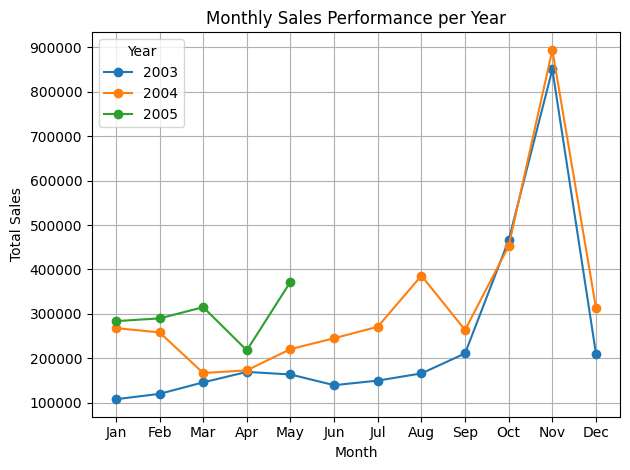

In [ ]:
# Tambahkan kolom 'Year' dan 'Month'
df_from_drive["Year"] = df_from_drive["ORDERDATE"].dt.year
df_from_drive["Month"] = df_from_drive["ORDERDATE"].dt.month

# Hitung total sales per bulan per tahun
monthly_sales = df_from_drive.groupby(["Year", "Month"])["SALES"].sum().reset_index()

# Pivot table agar setiap tahun jadi kolom, bulan jadi baris
pivot_sales = monthly_sales.pivot(index="Month", columns="Year", values="SALES")

# Plot line chart
plt.figure(figsize=(12, 6))
pivot_sales.plot(marker='o')
plt.title("Monthly Sales Performance per Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(ticks=range(1,13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                      "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Hitung total sales berdasarkan DEALSIZE
deal_sales = df_from_drive.groupby("DEALSIZE")["SALES"].sum()

# Hitung persentase kontribusi
deal_percent = deal_sales / deal_sales.sum() * 100

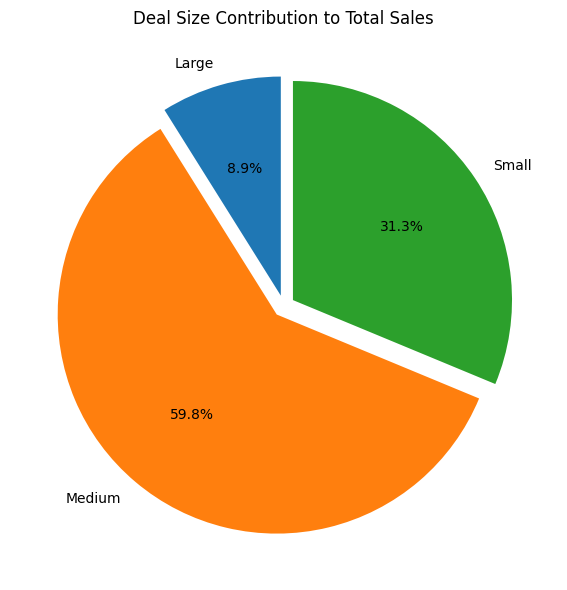

DEALSIZE
Large      8.908546
Medium    59.832670
Small     31.258784
Name: SALES, dtype: float64


In [ ]:
# Visualisasi
plt.figure(figsize=(8,6))
deal_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=(0.05, 0.05, 0.05))
plt.title("Deal Size Contribution to Total Sales")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Cetak kontribusi persentase
print(deal_percent)

In [ ]:
city_counts = df_from_drive['CITY'].value_counts()
most_buyers_city = city_counts.idxmax()

print(f"The city with the most buyers is: {most_buyers_city}")

The city with the most buyers is: Madrid


# Task
Create data visualizations based on the available data and user feedback.

## Review available data

### Subtask:
Identify the columns and data types in the `df_from_drive` DataFrame.


**Reasoning**:
Print the column names and their data types using the `.info()` method and display the first few rows of the DataFrame using the `.head()` method to understand the data content as requested.



In [ ]:
df_from_drive.info()
display(df_from_drive.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
 10  SALES            2824 non-null   float64       
 11  Year             2824 non-null   int32         
 12  Month            2824 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(6)
memory usage: 264.9+ KB


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,SALES,Year,Month
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00,2003,1
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00,2003,1
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22,2003,1
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03,2003,1
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00,2003,1


## Identify potential visualizations

### Subtask:
Based on the data types and previous analyses, suggest relevant chart types (e.g., distribution of numerical columns, relationships between variables, trends over time if applicable).


## Generate example visualizations

### Subtask:
Create a few example visualizations to demonstrate possibilities.


**Reasoning**:
Create example visualizations as requested, including a histogram of 'SALES', a scatter plot of 'QUANTITYORDERED' vs. 'PRICEEACH', and a bar plot of the top 10 cities by order count.



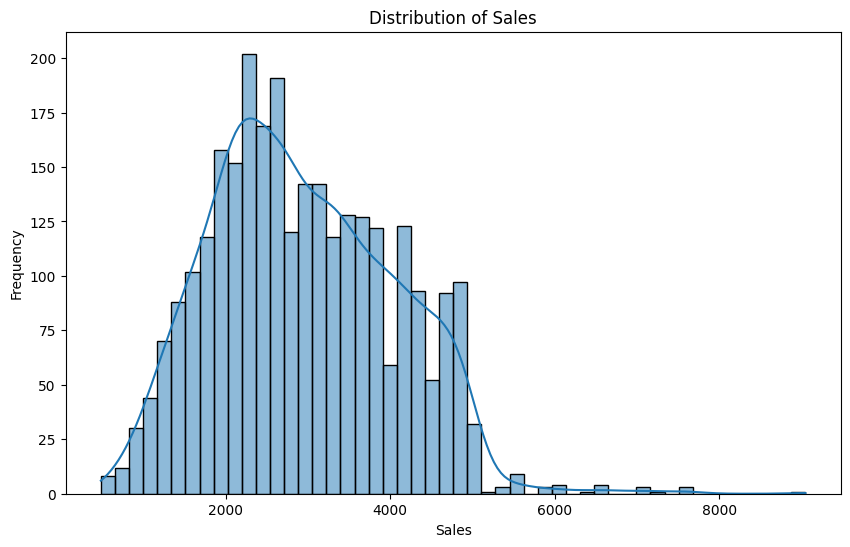

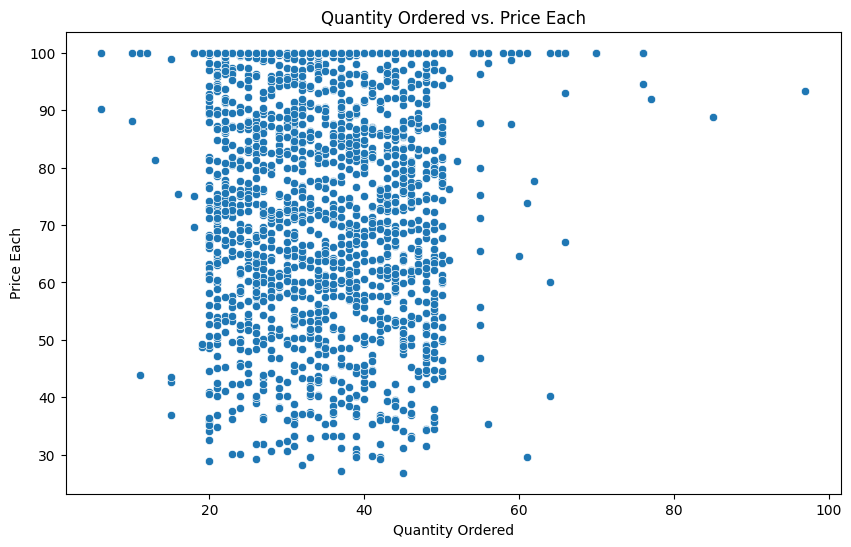

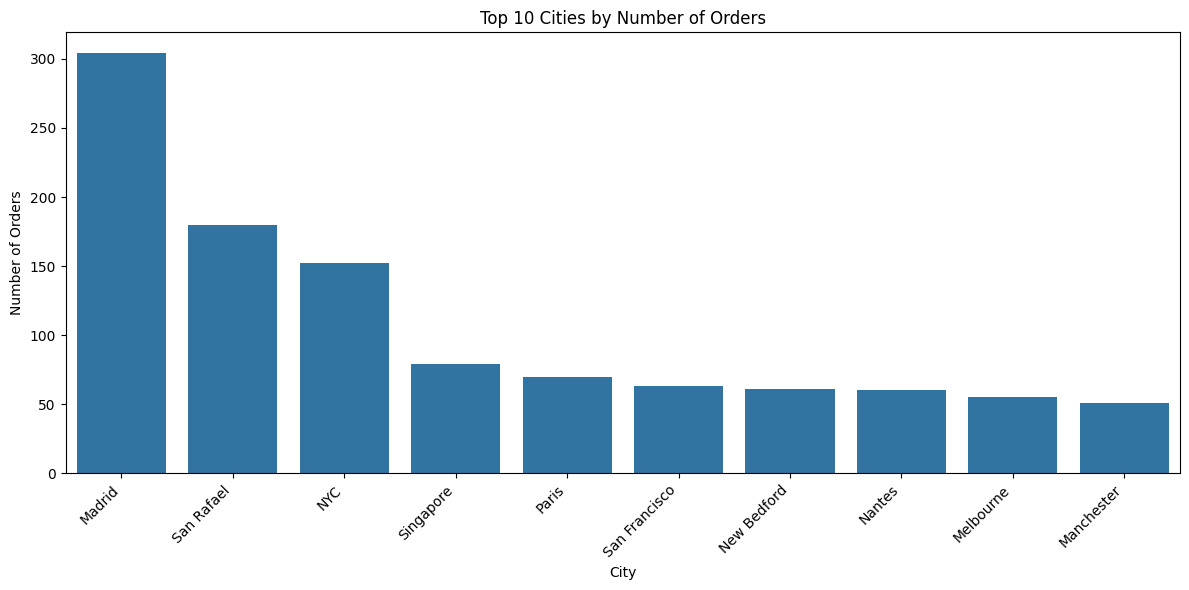

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of 'SALES'
plt.figure(figsize=(10, 6))
sns.histplot(df_from_drive['SALES'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot of 'QUANTITYORDERED' vs. 'PRICEEACH'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QUANTITYORDERED', y='PRICEEACH', data=df_from_drive)
plt.title('Quantity Ordered vs. Price Each')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')
plt.show()

# 3. Bar plot of top 10 cities by order count
city_counts = df_from_drive['CITY'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Top 10 Cities by Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Ask for user feedback

### Subtask:
Ask the user which visualizations are most helpful or what specific relationships they want to explore further.


## Generate requested visualizations

### Subtask:
Generate visualizations based on the user's feedback and specific requests.


## Summary:

### Data Analysis Key Findings

*   The dataset `df_from_drive` contains 2824 rows and 13 columns, including numerical columns like `SALES`, `QUANTITYORDERED`, and `PRICEEACH`, categorical columns like `STATUS`, `PRODUCTLINE`, `CITY`, and date information in `ORDERDATE`.
*   Initial visualizations generated include a histogram of `SALES` showing its distribution, a scatter plot of `QUANTITYORDERED` vs. `PRICEEACH` to explore their relationship, and a bar plot of the top 10 cities by order count indicating geographical sales concentration.

### Insights or Next Steps

*   The process is currently awaiting user feedback on the generated example visualizations to determine which specific relationships or aspects of the data are most valuable for further exploration and visualization.
*   Based on user feedback, more targeted visualizations can be created to address specific business questions or areas of interest, such as analyzing sales trends over time, comparing product line performance, or investigating sales patterns in specific cities.
